In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

dataset_path = "/kaggle/input/face-mask-lite-dataset/"
batch_size = 20
num_training_samples = 10
num_epochs = 10

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset_folder = datasets.ImageFolder(root=dataset_path, transform=transform)
subset_dataset, _ = random_split(dataset_folder, [num_training_samples, len(dataset_folder) - num_training_samples])
data_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)

In [4]:
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for data in data_loader:
        images, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.06947481632232666
Epoch 2/10, Loss: 0.06911352276802063
Epoch 3/10, Loss: 0.06837838888168335
Epoch 4/10, Loss: 0.06684065610170364
Epoch 5/10, Loss: 0.06388597190380096
Epoch 6/10, Loss: 0.059426162391901016
Epoch 7/10, Loss: 0.05379067733883858
Epoch 8/10, Loss: 0.04704166203737259
Epoch 9/10, Loss: 0.04019148275256157
Epoch 10/10, Loss: 0.03505557030439377


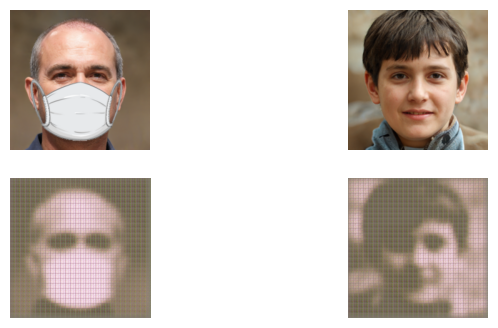

In [5]:
dataiter = iter(data_loader)
images, _ = next(dataiter)

with torch.no_grad():
    decoded_images = autoencoder(images)

plt.figure(figsize=(8, 4))

for i in range(2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(2, 2, i + 3)
    plt.imshow(decoded_images[i].permute(1, 2, 0).numpy())
    plt.axis('off')

plt.show()